# Linear regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [14]:
df = df.dropna()

In [15]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [29]:
lin_r = LinearRegression()
mse = cross_val_score(lin_r,x,y,scoring='neg_mean_squared_error',cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-3499.3561872902073


# Ridge regression

In [30]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [31]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [32]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3354.617157307127


# Lasso Regression

In [33]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

c:\users\ameya gupta\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900776.9336358524, tolerance: 424.6893591679955
  model = cd_fast.enet_coordinate_descent(
c:\users\ameya gupta\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811011.948100385, tolerance: 387.05788597776063
  model = cd_fast.enet_coordinate_descent(
c:\users\ameya gupta\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894478.7568392934, tolerance: 411.01572370583324
  model = cd_fast.enet_coordinate_descent(
c:\users\ameya gupta\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

{'alpha': 5}
-3356.4102569706833


# Model evaluation

In [34]:
prediction = lasso_regressor.predict(x_test)

c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

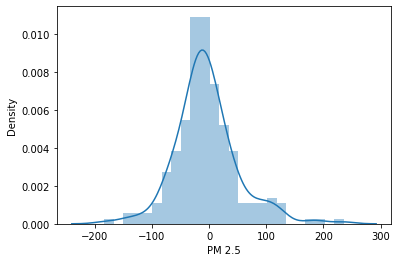

In [35]:
sns.distplot(y_test-prediction)

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.15696946997222
MSE: 3103.265102660339
RMSE: 55.70695739905689


In [38]:
import pickle
file = open('lasso_regression_model.pkl', 'wb')
pickle.dump(lasso_regressor, file)